In [179]:
import pandas as pd
from pandas import *
import numpy as np
from IPython.display import display
import pymysql
from sqlalchemy import create_engine
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas_profiling as pp

import getpass  # To get the password without showing the input

In [2]:
pd.set_option('display.max_rows', False)

# Traffic 2020

In [3]:
# source: https://api.viz.berlin.de/daten/verkehrsdetektion?path=2020%2F

Main detecting points Berlin

In [4]:
messquerschnitte = pd.read_excel('Stammdaten_Verkehrsdetektion_Berlin.xlsx', sheet_name='Messquerschnitte')

In [5]:
df_m = pd.DataFrame(messquerschnitte)
df_m

,MQ_SHORT_NAME,POSITION,POS_DETAIL,FAHRTZIEL,RICHTUNG,X_GK4,Y_GK4,LÄNGE (WGS84),BREITE (WGS84),ANZAHL_DET,MQ_ID15
0,TE001,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.880,5811848.940,13.192578,52.433868,2,100201010000077
1,TE002,A115,AS Spanische Allee – Brücke,AD Funkturm,Nordost,4581223.465,5811842.925,13.192747,52.433813,2,100201010000178
2,TE004,Clayallee,zwischen Scharfestraße und Propst-Süssmilch-We...,Potsdamer Chaussee,Süd,4585880.205,5812236.895,13.261301,52.436642,2,100201010000380
3,TE005,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,4586005.910,5812068.900,13.263106,52.435112,2,100201010000481
4,TE006,Teltower Damm,"zwischen Kirchstraße und Potsdamer Straße, in ...",Berliner Straße,Nord,4585789.255,5811912.520,13.259881,52.433741,2,100201010000582
5,TE009,Großbeerenstraße,zwischen Körtingstraße und Wilhelm-Pasewaldt-S...,Friedenstraße,Nordost,4593903.360,5812327.790,13.379267,52.436141,2,100201010000885
6,TE010,Marienfelder Allee,"zwischen Domagkstraße und Malteser Straße, in ...",stadtauswärts,Südwest,4592937.930,5809942.570,13.364413,52.414876,1,100201010000986
7,TE011,Marienfelder Allee,zwischen Ahrensdorfer Straße und Diedersdorfer...,stadteinwärts,Nord,4592631.085,5809349.330,13.359741,52.409598,2,100201010032514
8,TE012,Mariendorfer Damm,zwischen Kettinger Straße und Buckower Chausse...,Buckower Chaussee,Süd,4595359.905,5810131.485,13.400052,52.416157,2,100201010001289
...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
df_m.isna().sum()

MQ_SHORT_NAME      0
POSITION           0
POS_DETAIL         0
FAHRTZIEL         13
RICHTUNG           0
X_GK4              0
Y_GK4              0
LÄNGE (WGS84)      0
BREITE (WGS84)     0
ANZAHL_DET         0
MQ_ID15            0
dtype: int64

In [7]:
df_m['FAHRTZIEL'] = df_m['FAHRTZIEL'].fillna('Unbekannt')

In [8]:
df_m.isna().sum()

MQ_SHORT_NAME     0
POSITION          0
POS_DETAIL        0
FAHRTZIEL         0
RICHTUNG          0
X_GK4             0
Y_GK4             0
LÄNGE (WGS84)     0
BREITE (WGS84)    0
ANZAHL_DET        0
MQ_ID15           0
dtype: int64

In [9]:
#single detectors (need to join Main detecting points with the traffic datas)

In [10]:
einzeldetektoren = pd.read_excel('Stammdaten_Verkehrsdetektion_Berlin.xlsx', sheet_name='Einzeldetektoren')

In [11]:
df_e = pd.DataFrame(einzeldetektoren)
df_e

,MQ_SHORT_NAME,MQ_ID15,DET_ID15,DET_NAME,LANE
0,TE001,100201010000077,100101010000167,TEU00002_Det0,HF_R
1,TE001,100201010000077,100101010000268,TEU00002_Det1,HF_2vR
2,TE002,100201010000178,100101010000369,TEU00002_Det2,HF_R
3,TE002,100201010000178,100101010000470,TEU00002_Det3,HF_2vR
4,TE004,100201010000380,100101010000975,TEU00004_Det1,HF_2vR
5,TE004,100201010000380,100101010000874,TEU00004_Det0,HF_R
6,TE005,100201010000481,100101010001076,TEU00005_Det0,HF_R
7,TE005,100201010000481,100101010001177,TEU00005_Det1,HF_2vR
8,TE006,100201010000582,100101010001379,TEU00006_Det1,HF_2vR
...,...,...,...,...,...


In [12]:
df_e.isna().sum()

MQ_SHORT_NAME    0
MQ_ID15          0
DET_ID15         0
DET_NAME         0
LANE             0
dtype: int64

traffic datas = VERKEHRSDATEN

In [13]:
det_01 = pd.read_excel('1.xlsx')
det_02 = pd.read_excel('2.xlsx')
det_03 = pd.read_excel('3.xlsx')
det_04 = pd.read_excel('4.xlsx')
det_05 = pd.read_excel('5.xlsx')
det_06 = pd.read_excel('6.xlsx')
det_07 = pd.read_excel('7.xlsx')
det_08 = pd.read_excel('8.xlsx')
det_09 = pd.read_excel('9.xlsx')
det_10 = pd.read_excel('10.xlsx')
det_11 = pd.read_excel('11.xlsx')
det_12 = pd.read_excel('12.xlsx')

In [14]:
traffic = pd.concat([det_01, det_02, det_03, det_04, det_05, det_06, det_07, det_08, det_09, det_10, det_11, det_12], axis=0)
traffic

,detid_15,tag,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr
0,100101010000167,01.01.2020,0,1.0,129,77.2,128,77.3,1,71.0
1,100101010000167,01.01.2020,1,1.0,372,73.5,372,73.5,0,-1.0
2,100101010000167,01.01.2020,2,1.0,354,72.9,348,72.8,6,73.3
3,100101010000167,01.01.2020,3,1.0,232,73.3,229,73.6,3,48.7
4,100101010000167,01.01.2020,4,1.0,114,75.5,109,75.6,5,73.6
5,100101010000167,01.01.2020,5,1.0,105,77.8,103,77.8,2,78.5
6,100101010000167,01.01.2020,6,1.0,110,76.2,104,76.2,6,75.7
7,100101010000167,01.01.2020,7,1.0,123,75.3,117,75.8,6,64.3
8,100101010000167,01.01.2020,8,1.0,186,74.5,173,74.8,13,69.5
...,...,...,...,...,...,...,...,...,...,...


In [15]:
traffic = traffic.rename(columns={'detid_15':'DET_ID15'})

In [16]:
traffic.isna().sum()

DET_ID15        0
tag             0
stunde          0
qualitaet       0
q_kfz_det_hr    0
v_kfz_det_hr    0
q_pkw_det_hr    0
v_pkw_det_hr    0
q_lkw_det_hr    0
v_lkw_det_hr    0
dtype: int64

JOIN Tables

In [17]:
df_det = pd.merge(left = df_e,
                                  right = df_m,
                                  how = 'left', 
                                  left_on = "MQ_ID15", 
                                  right_on= "MQ_ID15")
display(df_det.shape)
df_det.head()

(560, 15)

,MQ_SHORT_NAME_x,MQ_ID15,DET_ID15,DET_NAME,LANE,MQ_SHORT_NAME_y,POSITION,POS_DETAIL,FAHRTZIEL,RICHTUNG,X_GK4,Y_GK4,LÄNGE (WGS84),BREITE (WGS84),ANZAHL_DET
0,TE001,100201010000077,100101010000167,TEU00002_Det0,HF_R,TE001,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.880,5811848.940,13.192578,52.433868,2
1,TE001,100201010000077,100101010000268,TEU00002_Det1,HF_2vR,TE001,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.880,5811848.940,13.192578,52.433868,2
2,TE002,100201010000178,100101010000369,TEU00002_Det2,HF_R,TE002,A115,AS Spanische Allee – Brücke,AD Funkturm,Nordost,4581223.465,5811842.925,13.192747,52.433813,2
3,TE002,100201010000178,100101010000470,TEU00002_Det3,HF_2vR,TE002,A115,AS Spanische Allee – Brücke,AD Funkturm,Nordost,4581223.465,5811842.925,13.192747,52.433813,2
4,TE004,100201010000380,100101010000975,TEU00004_Det1,HF_2vR,TE004,Clayallee,zwischen Scharfestraße und Propst-Süssmilch-We...,Potsdamer Chaussee,Süd,4585880.205,5812236.895,13.261301,52.436642,2


In [18]:
df_traf = pd.merge(left = traffic,
                                  right = df_det,
                                  how = 'inner', 
                                  left_on = "DET_ID15", 
                                  right_on= "DET_ID15")
display(df_traf.shape)
df_traf.head()

(4806436, 24)

,DET_ID15,tag,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,...,MQ_SHORT_NAME_y,POSITION,POS_DETAIL,FAHRTZIEL,RICHTUNG,X_GK4,Y_GK4,LÄNGE (WGS84),BREITE (WGS84),ANZAHL_DET
0,100101010000167,01.01.2020,0,1.0,129,77.2,128,77.3,1,71.0,...,TE001,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2
1,100101010000167,01.01.2020,1,1.0,372,73.5,372,73.5,0,-1.0,...,TE001,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2
2,100101010000167,01.01.2020,2,1.0,354,72.9,348,72.8,6,73.3,...,TE001,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2
3,100101010000167,01.01.2020,3,1.0,232,73.3,229,73.6,3,48.7,...,TE001,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2
4,100101010000167,01.01.2020,4,1.0,114,75.5,109,75.6,5,73.6,...,TE001,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2


In [19]:
df_traf.tail()

,DET_ID15,tag,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,...,MQ_SHORT_NAME_y,POSITION,POS_DETAIL,FAHRTZIEL,RICHTUNG,X_GK4,Y_GK4,LÄNGE (WGS84),BREITE (WGS84),ANZAHL_DET
4806431,100101010032604,15.12.2020,6,0.92,4,3.0,4,3.0,0,-1.0,...,TE191,Jafféstraße,"zwischen Silingenweg und Heerstraße, ca. 10 m ...",Heerstraße,Nord,4585801.395,5820115.415,13.262167,52.507438,2
4806432,100101010032604,15.12.2020,10,0.75,0,-1.0,0,-1.0,0,-1.0,...,TE191,Jafféstraße,"zwischen Silingenweg und Heerstraße, ca. 10 m ...",Heerstraße,Nord,4585801.395,5820115.415,13.262167,52.507438,2
4806433,100101010032604,15.12.2020,11,1.00,5,3.0,4,3.0,1,3.0,...,TE191,Jafféstraße,"zwischen Silingenweg und Heerstraße, ca. 10 m ...",Heerstraße,Nord,4585801.395,5820115.415,13.262167,52.507438,2
4806434,100101010032604,15.12.2020,12,1.00,5,33.0,3,33.0,2,33.0,...,TE191,Jafféstraße,"zwischen Silingenweg und Heerstraße, ca. 10 m ...",Heerstraße,Nord,4585801.395,5820115.415,13.262167,52.507438,2
4806435,100101010032604,17.12.2020,12,0.75,0,-1.0,0,-1.0,0,-1.0,...,TE191,Jafféstraße,"zwischen Silingenweg und Heerstraße, ca. 10 m ...",Heerstraße,Nord,4585801.395,5820115.415,13.262167,52.507438,2


In [20]:
df_traf.isna().sum()

DET_ID15           0
tag                0
stunde             0
qualitaet          0
q_kfz_det_hr       0
v_kfz_det_hr       0
q_pkw_det_hr       0
v_pkw_det_hr       0
q_lkw_det_hr       0
v_lkw_det_hr       0
MQ_SHORT_NAME_x    0
MQ_ID15            0
DET_NAME           0
LANE               0
MQ_SHORT_NAME_y    0
POSITION           0
POS_DETAIL         0
FAHRTZIEL          0
RICHTUNG           0
X_GK4              0
Y_GK4              0
LÄNGE (WGS84)      0
BREITE (WGS84)     0
ANZAHL_DET         0
dtype: int64

In [21]:
df_traf['FAHRTZIEL'] = df_traf['FAHRTZIEL'].fillna('Unbekannt')

In [22]:
cols = []
for column in df_traf.columns:
    cols.append(column.lower())
df_traf.columns = cols

#kick out space between words in columns and replace it with an underscore
df_traf.columns = df_traf.columns.str.replace(' ','_')
df_traf.columns = df_traf.columns.str.replace('(','_')
df_traf.columns = df_traf.columns.str.replace(')','')
df_traf.columns = df_traf.columns.str.replace('ä','ae')


C:\Users\User\AppData\Local\Temp\ipykernel_12980\1167529940.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_traf.columns = df_traf.columns.str.replace('(','_')
C:\Users\User\AppData\Local\Temp\ipykernel_12980\1167529940.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_traf.columns = df_traf.columns.str.replace(')','')


In [23]:
df_traf.head(5)

,det_id15,tag,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,...,mq_short_name_y,position,pos_detail,fahrtziel,richtung,x_gk4,y_gk4,laenge__wgs84,breite__wgs84,anzahl_det
0,100101010000167,01.01.2020,0,1.0,129,77.2,128,77.3,1,71.0,...,TE001,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2
1,100101010000167,01.01.2020,1,1.0,372,73.5,372,73.5,0,-1.0,...,TE001,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2
2,100101010000167,01.01.2020,2,1.0,354,72.9,348,72.8,6,73.3,...,TE001,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2
3,100101010000167,01.01.2020,3,1.0,232,73.3,229,73.6,3,48.7,...,TE001,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2
4,100101010000167,01.01.2020,4,1.0,114,75.5,109,75.6,5,73.6,...,TE001,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2


In [24]:
# detid_15 - ID des Detektors (15-stellige Ziffer).
# tag - Datum
# stunde - Stunde des Tages für die die Messwerte ermittelt wurden (8 => 08:00 - 08:59).
# qualitaet - gibt den Anteil der für die Stunde vorliegenden einwandfreien Messintervalle wieder: 1.0 = 100%.
# q_kfz_det_hr - Anzahl aller Kraftfahrzeuge in der Stunde.
# v_kfz_det_hr - Mittlere Geschwindigkeit [km/h] über alle Kraftfahrzeuge in der Stunde.
# q_pkw_det_hr - Anzahl aller Pkw in der Stunde.
# v_pkw_det_hr - Mittlere Geschwindigkeit [km/h] über alle Pkw in der Stunde.
# q_lkw_det_hr - Anzahl aller Lkw in der Stunde.
# v_lkw_det_hr - Mittlere Geschwindigkeit [km/h] über alle Lkw in der Stunde.

In [25]:
df_traf.dtypes

det_id15             int64
tag                 object
stunde               int64
qualitaet          float64
q_kfz_det_hr         int64
v_kfz_det_hr       float64
q_pkw_det_hr         int64
v_pkw_det_hr       float64
q_lkw_det_hr         int64
v_lkw_det_hr       float64
mq_short_name_x     object
mq_id15              int64
det_name            object
lane                object
mq_short_name_y     object
position            object
pos_detail          object
fahrtziel           object
richtung            object
x_gk4              float64
y_gk4              float64
laenge__wgs84      float64
breite__wgs84      float64
anzahl_det           int64
dtype: object

In [26]:
df_traf[['day', 'month', 'year']] = df_traf['tag'].str.split('.', expand=True)
df_traf = df_traf.drop(['day'], axis = 1)
df_traf = df_traf.drop(['year'], axis = 1)

In [27]:
df_traf = df_traf.rename(columns={'laenge__wgs84': 'longitude', 'breite__wgs84': 'latitude'})

In [28]:
df_traf.head(5)

,det_id15,tag,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,...,position,pos_detail,fahrtziel,richtung,x_gk4,y_gk4,longitude,latitude,anzahl_det,month
0,100101010000167,01.01.2020,0,1.0,129,77.2,128,77.3,1,71.0,...,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2,01
1,100101010000167,01.01.2020,1,1.0,372,73.5,372,73.5,0,-1.0,...,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2,01
2,100101010000167,01.01.2020,2,1.0,354,72.9,348,72.8,6,73.3,...,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2,01
3,100101010000167,01.01.2020,3,1.0,232,73.3,229,73.6,3,48.7,...,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2,01
4,100101010000167,01.01.2020,4,1.0,114,75.5,109,75.6,5,73.6,...,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,4581211.88,5811848.94,13.192578,52.433868,2,01


In [85]:
df_traf_desc = df_traf.drop(['det_id15', 'tag', 'stunde', 'qualitaet', 'mq_id15', 'x_gk4', 'y_gk4', 'longitude', 'latitude', 'anzahl_det'], axis = 1)

In [86]:
# description (hours of all days)
df_traf_desc.describe().T

,count,mean,std,min,25%,50%,75%,max
q_kfz_det_hr,4806436.0,223.162805,211.935468,-1.0,50.0,166.0,349.0,3800.0
v_kfz_det_hr,4806436.0,42.744085,16.545530,-1.0,36.0,43.7,50.6,250.0
q_pkw_det_hr,4806436.0,209.377211,201.467299,-1.0,45.0,154.0,328.0,3800.0
v_pkw_det_hr,4806436.0,43.268432,16.894609,-1.0,36.7,44.3,51.4,250.0
q_lkw_det_hr,4806436.0,14.247138,41.561203,-1.0,1.0,5.0,15.0,3557.0
v_lkw_det_hr,4806436.0,27.672680,19.871399,-1.0,11.5,30.0,41.9,215.0


In [29]:
# Export as csv
df_traf.to_csv(r'C:\Users\User\IH-Labs\Project_week_5\created_csv\traffic.csv',index=False)

Group the Traffic of 2020 by 'position' and 1st 'wgs'and 2nd 'month' with the sum of 'q_kfz_det_hr'

In [30]:
df_traf_p = pd.DataFrame(df_traf.groupby(['position', 'longitude', 'latitude']).agg({'q_kfz_det_hr':sum}).reset_index())

In [31]:
df_traf_p
# different wgs because of different lanes which are counted seperatly by dedectors

,position,longitude,latitude,q_kfz_det_hr
0,A114,13.429938,52.581949,7056923
1,A115,13.192578,52.433868,8592705
2,A115,13.192747,52.433813,10691085
3,Adlergestell,13.522509,52.448224,3212320
4,Adlergestell,13.552849,52.427717,6826335
5,Alt-Moabit,13.354075,52.524184,2682149
6,Alt-Moabit,13.355402,52.523696,2243178
7,Altonaer Straße,13.346564,52.515935,2734159
8,Am Juliusturm,13.225404,52.537432,7488145
...,...,...,...,...


In [32]:
df_traf_pm = pd.DataFrame(df_traf.groupby(['position', 'longitude', 'latitude', 'stunde', 'month']).agg({'q_kfz_det_hr':sum, 'v_kfz_det_hr':max}).reset_index())

In [33]:
df_traf_pm

,position,longitude,latitude,stunde,month,q_kfz_det_hr,v_kfz_det_hr
0,A114,13.429938,52.581949,0,01,2944,102.3
1,A114,13.429938,52.581949,0,02,7354,101.2
2,A114,13.429938,52.581949,0,03,2717,101.7
3,A114,13.429938,52.581949,0,04,8004,102.8
4,A114,13.429938,52.581949,0,05,8659,101.1
5,A114,13.429938,52.581949,0,06,6835,101.9
6,A114,13.429938,52.581949,0,07,5310,100.9
7,A114,13.429938,52.581949,0,08,7016,101.0
8,A114,13.429938,52.581949,0,09,2775,101.4
...,...,...,...,...,...,...,...


In [34]:
df_traf_pm.to_csv(r'C:\Users\User\IH-Labs\Project_week_5\created_csv\traffic_compact.csv',index=False)

# Accidents 2020

In [35]:
# source: https://daten.berlin.de/datensaetze/strassenverkehrsunf%C3%A4lle-nach-unfallort-berlin-2020

In [191]:
accidents = pd.read_excel('accidents.xlsx')
accidents.head(10)

,OBJECTID,LAND,BEZ,LOR,LOR_ab_2021,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
0,3187,11,8,8010510.0,8100521.0,2020,1,11,4,2,...,1,0,0,1,0,1,802599.5332,5821795.373,13.455006,52.462301
1,3198,11,4,4041137.0,4400727.0,2020,1,2,3,2,...,0,0,0,1,0,1,791264.2064,5824629.955,13.291116,52.493873
2,3215,11,4,4041239.0,4400830.0,2020,1,7,1,3,...,0,0,0,0,1,1,792294.8083,5823598.115,13.305348,52.484072
3,3224,11,2,2040502.0,2400521.0,2020,1,22,6,2,...,1,0,0,0,0,0,801024.2746,5827862.923,13.437371,52.517556
4,3241,11,4,4041137.0,4400727.0,2020,1,17,1,3,...,0,0,1,0,0,1,791889.2861,5824003.006,13.299748,52.487919
5,3252,11,7,4051655.0,4501153.0,2020,1,14,6,3,...,1,0,0,0,0,0,794432.6450,5823090.628,13.336292,52.478374
6,3274,11,7,7010104.0,7100205.0,2020,1,13,2,3,...,0,1,0,0,1,0,796076.5121,5825501.675,13.362568,52.499098
7,3290,11,7,7040401.0,7400721.0,2020,1,15,7,2,...,1,0,0,0,0,0,797817.4941,5822978.170,13.385884,52.475531
8,3299,11,3,3020209.0,3200206.0,2020,1,13,5,3,...,1,0,0,0,0,0,797966.8713,5834349.850,13.398267,52.577382
9,3303,11,1,1044102.0,1400940.0,2020,1,9,1,3,...,1,0,0,0,0,0,795861.6732,5832069.458,13.365257,52.558089


In [37]:
# OBJECTID:         Laufende Nummer des Unfalls
# LAND:             Bundesland 11 = Berlin
# BEZ:              Bezirke
# LOR:              Lebensweltlich orientierte Räume (LOR) – Schlüssel
# LOR_ab_2021:      Lebensweltlich orientierte Räume (LOR) gültig ab 2021- Schlüssel
# UJAHR:            Unfalljahr
# UMONAT:           Unfallmonat
# USTUNDE:          Unfallstunde
# UWOCHENTAG:       Wochentag
#                   1 = Sonntag
#                   2 = Montag
#                   3 = Dienstag
#                   4 = Mittwoch
#                   5 = Donnerstag
#                   6 = Freitag
#                   7 = Samstag
# UKATEGORIE:       Unfallkategorie
#                   1 = Unfall mit Getöteten
#                   2 = Unfall mit Schwerverletzten
#                   3 = Unfall mit Leichtverletzten
# UART:             Unfallart
#                   1 = Zusammenstoß mit anfahrendem/anhaltendem/ ruhendem Fahrzeug
#                   2 = Zusammenstoß mit vorausfahrendem/wartendem Fahrzeug
#                   3 = Zusammenstoß mit seitlich in gleicher Richtung fahrendem Fahrzeug
#                   4 = Zusammenstoß mit entgegenkommendem Fahrzeug
#                   5 = Zusammenstoß mit einbiegendem/ kreuzendem Fahrzeug
#                   6 = Zusammenstoß zwischen Fahrzeug und Fußgänger
#                   7 = Aufprall auf Fahrbahnhindernis
#                   8 = Abkommen von Fahrbahn nach rechts
#                   9 = Abkommen von Fahrbahn nach links
#                   0 = Unfall anderer Art
# UTYP1:            Unfalltyp
#                   1 = Fahrunfall
#                   2 = Abbiegeunfall
#                   3 = Einbiegen / Kreuzen-Unfall
#                   4 = Überschreiten-Unfall
#                   5 = Unfall durch ruhenden Verkehr
#                   6 = Unfall im Längsverkehr
#                   7 = sonstiger Unfall
# ULICHTVERH:       Lichtverhältnisse:
#                   0 = Tageslicht
#                   1 = Dämmerung
#                   2 = Dunkelheit
# IstRad:           Unfall mit Rad
#                   0 = Unfall ohne Fahrradbeteiligung
#                   1 = Unfall mit Fahrradbeteiligung           Unfall, an dem mindestens ein Fahrrad beteiligt war
#                                                           
# IstPKW:           Unfall mit Pkw
#                   0 = Unfall ohne PKW-Beteiligung             Unfall, an dem mindestens ein Personenkraftwagen beteiligt war
#                   1 = Unfall mit PKW-Beteiligung
# IstFuss:          Unfall mit Fußgänger
#                   0 = Unfall ohne Fußgängerbeteiligung
#                   1 = Unfall mit Fußgängerbeteiligung         Unfall, an dem mindestens eine Fußgängerin oder ein Fußgänger beteiligt war
# 
# IstKrad:          Unfall mit Kraftrad
#                   0 = Unfall ohne Kraftradbeteiligung
#                   1 = Unfall mit Kraftradbeteiligung          Unfall, an dem mindestens ein Kraftrad, wie z. B. Mofa, Motorrad/-roller beteiligt war
# IstGkfz:          Unfall mit Güterkraftfahrzeug (GKFZ)
#                   0 = Unfall ohne Güterkraftfahrzeugbeteiligung
#                   1 = Unfall mit Güterkraftfahrzeugbeteiligung 
#                                                               Unfall, an dem mindestens ein Lastkraftwagen mit Normalaufbau und einem Gesamtgewicht über 3,5 t, ein Lastkraftwagen mit Tankauflage bzw. Spezialaufbau, eine Sattelzugmaschine oder eine andere Zugmaschine beteiligt war
# 
# IstSonstige:      Unfall mit Sonstigen
#                   0 = Unfall ohne Beteiligung eines oben nicht genannten Verkehrsmittels
#                   1 = Unfall mit Beteiligung eines oben nicht genannten Verkehrsmittels
#                                                                Unfall, an dem mindestens ein oben nicht genanntes Verkehrsmittel beteiligt war, wie z. B. ein Bus oder eine Straßenbahn
# USTRZUSTAND:      Straßenzustand:
#                   0 = trocken
#                   1 = nass/feucht/schlüpfrig
#                   2 = winterglatt
# LINREFX:          Grafische Koordinate 1 und Grafische Koordinate 2
# LINREFY:                                                      LINREFX und LINREFY bilden die Koordinate des auf dem Straßenabschnitt liegenden Unfallortes
# 
# XGCSWGS84:        Grafische Koordinate 1 und Grafische Koordinate 2
# YGCSWGS84:                                                    XGCSWGS84 und YGCSWGS84 bilden die Koordinate des auf dem Straßenabschnitt liegenden Unfallortes

# DISTRICTS:
# Bezirks-Nr. 1:        Mitte                       (entstanden aus Mitte, Tiergarten, Wedding)
# Bezirks-Nr. 2:        Friedrichshain-Kreuzberg    (entstanden aus Friedrichshain, Kreuzberg)
# Bezirks-Nr. 3:        Pankow                      (entstanden aus Pankow, Prenzlauer Berg, Weißensee)
# Bezirks-Nr. 4:        Charlottenburg-Wilmersdorf  (entstanden aus Charlottenburg, Wilmersdorf)
# Bezirks-Nr. 5:        Spandau                     (entstanden aus Spandau)
# Bezirks-Nr. 6:        Steglitz-Zehlendorf         (entstanden aus Steglitz, Zehlendorf)
# Bezirks-Nr. 7:        Tempelhof-Schöneberg        (entstanden aus Schöneberg, Tempelhof)
# Bezirks-Nr. 8:        Neukölln                    (entstanden aus Neukölln)
# Bezirks-Nr. 9:        Treptow-Köpenick            (entstanden aus Köpenick, Treptow)
# Bezirks-Nr. 10:       Marzahn-Hellersdorf         (entstanden aus Hellersdorf, Marzahn)
# Bezirks-Nr. 11:       Lichtenberg                 (entstanden aus Hohenschönhausen, Lichtenberg)
# Bezirks-Nr. 12:       Reinickendorf               (entstanden aus Reinickendorf)

Accident Groupbys

In [192]:
accidents['all_acc'] = accidents['IstRad'] + accidents['IstFuss'] +	accidents['IstPKW'] + accidents['IstKrad'] + accidents['IstGkfz'] + accidents['IstSonstige']				

In [193]:
accidents['perc_bike_acc'] = accidents['IstRad'] / accidents['all_acc']

In [194]:
# accidents combined with light conditions
acc_cat = pd.DataFrame(accidents.groupby(['UKATEGORIE', 'ULICHTVERH']).agg({'IstRad':sum, 'IstFuss':sum, 'IstPKW':sum, 'IstKrad':sum, 'IstGkfz':sum, 'IstSonstige':sum, 'all_acc': sum}).reset_index())

In [195]:
acc_cat
# the better the light conditions, the more accidents happen - it seems that when conditions are good, 
# road users tend to be careless and cause more accidents

,UKATEGORIE,ULICHTVERH,IstRad,IstFuss,IstPKW,IstKrad,IstGkfz,IstSonstige,all_acc
0,1,0,15,10,12,5,14,3,59
1,1,1,0,1,0,0,0,1,2
2,1,2,2,6,8,5,0,3,24
3,2,0,526,206,904,284,63,153,2136
4,2,1,32,26,71,25,1,13,168
5,2,2,102,97,276,70,6,47,598
6,3,0,3579,717,6200,1095,235,1018,12844
7,3,1,256,79,468,88,12,58,961
8,3,2,597,254,1439,225,31,231,2777


In [196]:
# accidents combined with road conditions
acc_cat2 = pd.DataFrame(accidents.groupby(['UKATEGORIE', 'USTRZUSTAND']).agg({'IstRad':sum, 'IstFuss':sum, 'IstPKW':sum, 'IstKrad':sum, 'IstGkfz':sum, 'IstSonstige':sum, 'all_acc': sum}).reset_index())

In [197]:
acc_cat2
# # the better the road conditions, the more accidents happen - it seems that when conditions are good, 
# road users tend to be careless and cause more accidents

,UKATEGORIE,USTRZUSTAND,IstRad,IstFuss,IstPKW,IstKrad,IstGkfz,IstSonstige,all_acc
0,1,0,14,14,17,9,13,4,71
1,1,1,3,3,2,1,1,3,13
2,1,2,0,0,1,0,0,0,1
3,2,0,548,220,952,308,53,170,2251
4,2,1,110,108,297,70,17,43,645
5,2,2,2,1,2,1,0,0,6
6,3,0,3623,784,6219,1008,194,1019,12847
7,3,1,800,266,1883,397,84,287,3717
8,3,2,9,0,5,3,0,1,18


In [198]:
# focusing accidents by hours 
acc_cat3 = pd.DataFrame(accidents.groupby(['USTUNDE']).agg({'IstRad':sum, 'IstFuss':sum, 'IstPKW':sum, 'IstKrad':sum, 'IstGkfz':sum, 'IstSonstige':sum, 'all_acc': sum}).reset_index())

In [199]:
pd.set_option('display.max_rows', 24)

In [200]:
acc_cat3

,USTUNDE,IstRad,IstFuss,IstPKW,IstKrad,IstGkfz,IstSonstige,all_acc
0,0,39,10,94,10,1,25,179
1,1,31,2,44,8,0,12,97
2,2,19,4,42,4,1,12,82
3,3,11,5,29,3,0,10,58
4,4,7,2,36,8,1,6,60
5,5,31,19,105,34,8,16,213
6,6,82,24,206,44,14,52,422
7,7,263,84,429,67,34,75,952
8,8,349,54,482,71,25,83,1064
9,9,301,68,462,71,33,80,1015


In [201]:
# create bins to concentrate on rushhours
def rushhours(x):
    if x <=3:
        return '00 to 04'
    elif x<=7:
        return '04 to 08'
    elif x<=11:
        return '08 to 12'
    elif x<=15:
        return '12 to 16'  
    elif x<=19:
        return '16 to 20'       
    else:
        return '20 to 24'
    
accidents['rushhours'] = list(map(rushhours, accidents['USTUNDE']))

accidents.head(5)

,OBJECTID,LAND,BEZ,LOR,LOR_ab_2021,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,all_acc,perc_bike_acc,rushhours
0,3187,11,8,8010510.0,8100521.0,2020,1,11,4,2,...,1,0,1,802599.5332,5821795.373,13.455006,52.462301,2,0.0,08 to 12
1,3198,11,4,4041137.0,4400727.0,2020,1,2,3,2,...,1,0,1,791264.2064,5824629.955,13.291116,52.493873,1,0.0,00 to 04
2,3215,11,4,4041239.0,4400830.0,2020,1,7,1,3,...,0,1,1,792294.8083,5823598.115,13.305348,52.484072,1,0.0,04 to 08
3,3224,11,2,2040502.0,2400521.0,2020,1,22,6,2,...,0,0,0,801024.2746,5827862.923,13.437371,52.517556,1,0.0,20 to 24
4,3241,11,4,4041137.0,4400727.0,2020,1,17,1,3,...,0,0,1,791889.2861,5824003.006,13.299748,52.487919,1,0.0,16 to 20


In [202]:
acc_cat4 = pd.DataFrame(accidents.groupby(['UKATEGORIE', 'rushhours']).agg({'IstRad':sum, 'IstFuss':sum, 'IstPKW':sum, 'IstKrad':sum, 'IstGkfz':sum, 'IstSonstige':sum, 'all_acc': sum}).reset_index())

In [203]:
acc_cat4

,UKATEGORIE,rushhours,IstRad,IstFuss,IstPKW,IstKrad,IstGkfz,IstSonstige,all_acc
0,1,00 to 04,0,0,0,2,0,0,2
1,1,04 to 08,0,1,2,1,0,2,6
2,1,08 to 12,6,6,5,3,6,2,28
3,1,12 to 16,7,3,3,0,8,1,22
4,1,16 to 20,3,3,8,3,0,0,17
5,1,20 to 24,1,4,2,1,0,2,10
6,2,00 to 04,23,5,44,7,2,16,97
7,2,04 to 08,39,36,111,38,4,17,245
8,2,08 to 12,151,57,231,52,24,49,564
9,2,12 to 16,204,87,381,118,31,68,889


In [204]:
acc_cat5 = pd.DataFrame(accidents.groupby(['rushhours']).agg({'IstRad':sum, 'IstFuss':sum, 'IstPKW':sum, 'IstKrad':sum, 'IstGkfz':sum, 'IstSonstige':sum, 'all_acc': sum}).reset_index())

In [205]:
acc_cat5

,rushhours,IstRad,IstFuss,IstPKW,IstKrad,IstGkfz,IstSonstige,all_acc
0,00 to 04,100,21,209,25,2,59,416
1,04 to 08,383,129,776,153,57,149,1647
2,08 to 12,1181,270,1957,311,124,358,4201
3,12 to 16,1498,401,2899,578,124,506,6006
4,16 to 20,1552,446,2758,545,44,345,5690
5,20 to 24,395,129,779,185,11,110,1609


In [206]:
416+1647

2063

In [207]:
# most accidents happend during the rushhours in Berlin

In [208]:
accidents.columns

Index(['OBJECTID', 'LAND', 'BEZ', 'LOR', 'LOR_ab_2021', 'UJAHR', 'UMONAT',
       'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART', 'UTYP1', 'ULICHTVERH',
       'IstRad', 'IstPKW', 'IstFuss', 'IstKrad', 'IstGkfz', 'IstSonstige',
       'USTRZUSTAND', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84',
       'all_acc', 'perc_bike_acc', 'rushhours'],
      dtype='object')

In [209]:
accidents = accidents.drop(['OBJECTID', 'LAND', 'LOR','UJAHR','LINREFX', 'LINREFY'], axis=1)

In [210]:
accidents = pd.DataFrame(accidents)
accidents.head(5)

,BEZ,LOR_ab_2021,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,...,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,XGCSWGS84,YGCSWGS84,all_acc,perc_bike_acc,rushhours
0,8,8100521.0,1,11,4,2,3,6,0,0,...,0,0,1,0,1,13.455006,52.462301,2,0.0,08 to 12
1,4,4400727.0,1,2,3,2,9,1,2,0,...,0,0,1,0,1,13.291116,52.493873,1,0.0,00 to 04
2,4,4400830.0,1,7,1,3,0,1,1,0,...,0,0,0,1,1,13.305348,52.484072,1,0.0,04 to 08
3,2,2400521.0,1,22,6,2,1,5,2,0,...,0,0,0,0,0,13.437371,52.517556,1,0.0,20 to 24
4,4,4400727.0,1,17,1,3,0,1,2,0,...,0,1,0,0,1,13.299748,52.487919,1,0.0,16 to 20


In [211]:
cols = []
for column in accidents.columns:
    cols.append(column.lower())
accidents.columns = cols

#kick out space between words in columns and replace it with an underscore
accidents.columns = accidents.columns.str.replace(' ','_')
accidents.columns = accidents.columns.str.replace('(','_')
accidents.columns = accidents.columns.str.replace(')','')

C:\Users\User\AppData\Local\Temp\ipykernel_12980\3487293015.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  accidents.columns = accidents.columns.str.replace('(','_')
C:\Users\User\AppData\Local\Temp\ipykernel_12980\3487293015.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  accidents.columns = accidents.columns.str.replace(')','')


In [212]:
accidents.dtypes

bez                int64
lor_ab_2021      float64
umonat             int64
ustunde            int64
uwochentag         int64
ukategorie         int64
uart               int64
utyp1              int64
ulichtverh         int64
istrad             int64
istpkw             int64
istfuss            int64
istkrad            int64
istgkfz            int64
istsonstige        int64
ustrzustand        int64
xgcswgs84        float64
ygcswgs84        float64
all_acc            int64
perc_bike_acc    float64
rushhours         object
dtype: object

In [213]:
accidents.columns

Index(['bez', 'lor_ab_2021', 'umonat', 'ustunde', 'uwochentag', 'ukategorie',
       'uart', 'utyp1', 'ulichtverh', 'istrad', 'istpkw', 'istfuss', 'istkrad',
       'istgkfz', 'istsonstige', 'ustrzustand', 'xgcswgs84', 'ygcswgs84',
       'all_acc', 'perc_bike_acc', 'rushhours'],
      dtype='object')

In [214]:
# describe
accidents_desc = accidents.drop(['bez', 'lor_ab_2021', 'xgcswgs84', 'ygcswgs84', 'perc_bike_acc'], axis=1)

In [215]:
accidents_desc.describe().T

,count,mean,std,min,25%,50%,75%,max
umonat,11810.0,6.776715,3.191813,1.0,4.0,7.0,9.0,12.0
ustunde,11810.0,13.523793,4.684416,0.0,10.0,14.0,17.0,23.0
uwochentag,11810.0,4.061135,1.802461,1.0,3.0,4.0,6.0,7.0
ukategorie,11810.0,2.844877,0.372414,1.0,3.0,3.0,3.0,3.0
uart,11810.0,3.446232,2.197319,0.0,2.0,5.0,5.0,9.0
utyp1,11810.0,3.851905,1.929136,1.0,2.0,3.0,6.0,7.0
ulichtverh,11810.0,0.423709,0.781365,0.0,0.0,0.0,0.0,2.0
istrad,11810.0,0.432599,0.495457,0.0,0.0,0.0,1.0,1.0
istpkw,11810.0,0.794073,0.404395,0.0,1.0,1.0,1.0,1.0
istfuss,11810.0,0.118205,0.322864,0.0,0.0,0.0,0.0,1.0


In [216]:
# 1 accident with bycicle per hour is maximum. 0 is minimum
# minimum 1 accident per hour and maximum 4

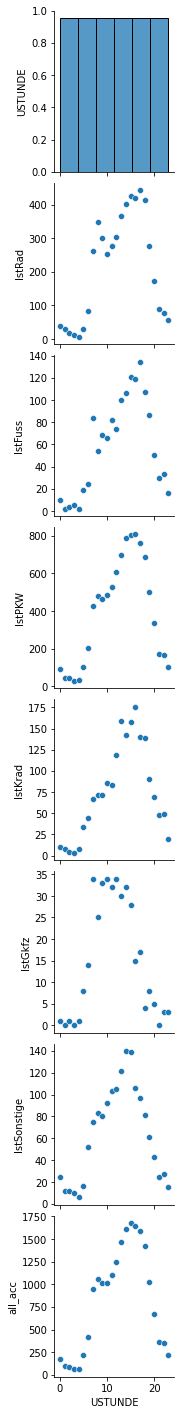

In [217]:
sns.pairplot(acc_cat3, x_vars=['USTUNDE'])

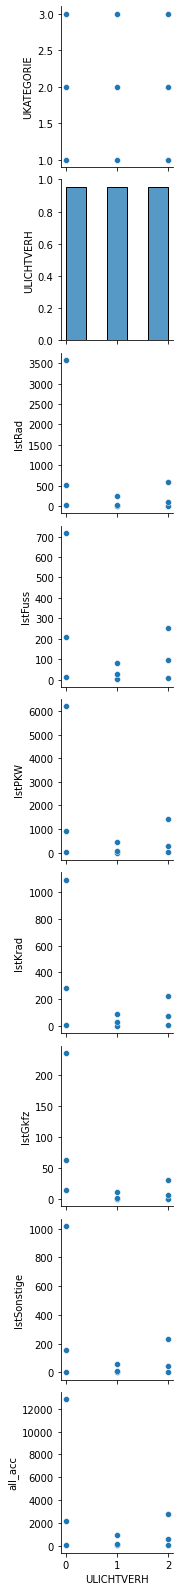

In [218]:
sns.pairplot(acc_cat, x_vars=['ULICHTVERH'])

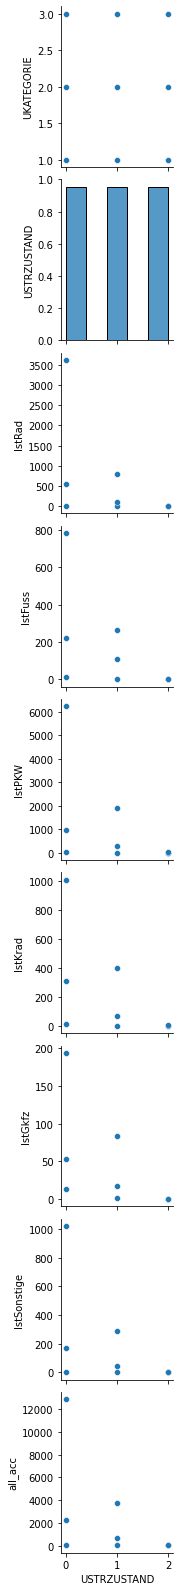

In [219]:
sns.pairplot(acc_cat2, x_vars=['USTRZUSTAND'])

In [59]:
# Export as csv
accidents.to_csv(r'C:\Users\User\IH-Labs\Project_week_5\created_csv\accidents.csv',index=False)

In [220]:
accidents.columns

Index(['bez', 'lor_ab_2021', 'umonat', 'ustunde', 'uwochentag', 'ukategorie',
       'uart', 'utyp1', 'ulichtverh', 'istrad', 'istpkw', 'istfuss', 'istkrad',
       'istgkfz', 'istsonstige', 'ustrzustand', 'xgcswgs84', 'ygcswgs84',
       'all_acc', 'perc_bike_acc', 'rushhours'],
      dtype='object')

In [221]:
accidents = accidents.drop(['bez', 'lor_ab_2021','umonat', 'ustunde', 'uwochentag', 'ukategorie', 'uart', 'utyp1', 'xgcswgs84', 'ygcswgs84'], axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_12980\2090353288.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


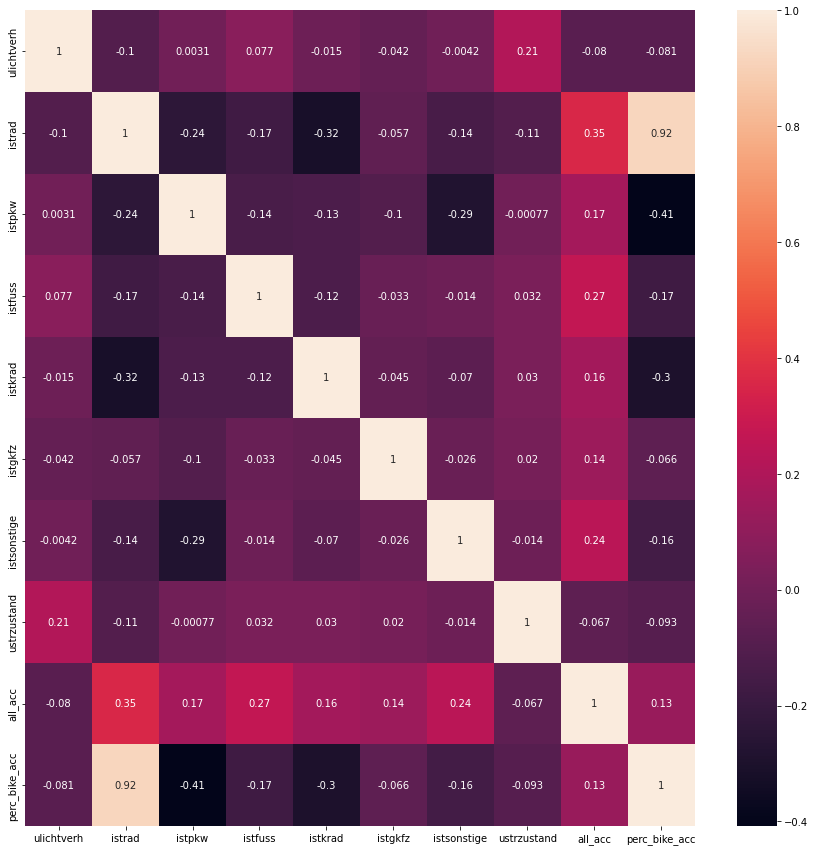

In [222]:
corr_matrix=accidents.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15)) 
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

HYPOTHESIS TEST

In [223]:
acc_cat5

,rushhours,IstRad,IstFuss,IstPKW,IstKrad,IstGkfz,IstSonstige,all_acc
0,00 to 04,100,21,209,25,2,59,416
1,04 to 08,383,129,776,153,57,149,1647
2,08 to 12,1181,270,1957,311,124,358,4201
3,12 to 16,1498,401,2899,578,124,506,6006
4,16 to 20,1552,446,2758,545,44,345,5690
5,20 to 24,395,129,779,185,11,110,1609


In [224]:
acc_cat5['all_acc'].sum()

19569

In [225]:
acc_cat5['IstRad'].sum()

5109

In [226]:
416+1647

2063

In [227]:
#mean of rushhour main times
acc_cat5[['all_acc']].iloc[[2,3,4]].mean(axis=0)

all_acc    5299.0
dtype: float64

In [228]:
# most accidents happen during the rushhours between 8 am to 20 pm
# 2-sided test:
# Null hypothesis or H0: most accidents/year don't happen between 8 am to 20 pm != 5299
# Alternative hyp or H1: most accidents/year happen between 8 am to 20 pm = 5299
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(acc_cat5['all_acc'], 5299)

In [233]:
print('stat is  ', stat)

print('pvalue for the 2-tailed test is ', pval)

stat is   -2.118614181703414
pvalue for the 2-tailed test is  0.08765939316494635


In [230]:
#p-value is close to 0 and stat is negative = it's true that the most accidents happen during the rushhours between 8 am to 20 pm

LINEAR REGRESSION

In [234]:
accidents_desc.head(5)

,umonat,ustunde,uwochentag,ukategorie,uart,utyp1,ulichtverh,istrad,istpkw,istfuss,istkrad,istgkfz,istsonstige,ustrzustand,all_acc,rushhours
0,1,11,4,2,3,6,0,0,1,0,0,1,0,1,2,08 to 12
1,1,2,3,2,9,1,2,0,0,0,0,1,0,1,1,00 to 04
2,1,7,1,3,0,1,1,0,0,0,0,0,1,1,1,04 to 08
3,1,22,6,2,1,5,2,0,1,0,0,0,0,0,1,20 to 24
4,1,17,1,3,0,1,2,0,0,0,1,0,0,1,1,16 to 20


In [235]:
acc_log = pd.DataFrame(accidents_desc.groupby(['ustunde', 'utyp1', 'ustrzustand', 'ulichtverh']).agg({'istrad':sum, 'istfuss':sum, 'istpkw':sum, 'istkrad':sum, 'istgkfz':sum, 'istsonstige':sum, 'all_acc': sum}).reset_index())

In [236]:
acc_log

,ustunde,utyp1,ustrzustand,ulichtverh,istrad,istfuss,istpkw,istkrad,istgkfz,istsonstige,all_acc
0,0,1,0,2,13,0,11,2,0,1,27
1,0,1,1,2,3,0,5,0,0,3,11
2,0,2,0,2,6,2,13,3,0,3,27
3,0,2,1,2,3,0,6,1,0,2,12
4,0,3,0,2,4,0,12,1,0,5,22
...,...,...,...,...,...,...,...,...,...,...,...
589,23,5,1,2,3,0,5,3,1,0,12
590,23,6,0,2,1,0,10,1,2,1,15
591,23,6,1,2,0,0,4,0,0,1,5
592,23,7,0,2,3,2,2,0,0,0,7


In [264]:
y = acc_log['all_acc']
X = acc_log[['ustunde']]

lm = linear_model.LinearRegression()

lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

23.581888727670048
[0.74349707]


C:\Users\User\AppData\Local\Temp\ipykernel_12980\225515308.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


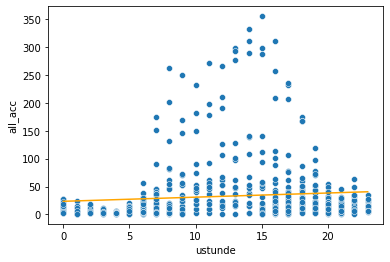

In [266]:
regression_line = lm.intercept_ + lm.coef_[0]*acc_log['ustunde']
plt.plot(acc_log['ustunde'], regression_line, c = 'orange')
sns.scatterplot(x='ustunde',y='all_acc',data=acc_log)
plt.show()

In [267]:
print('R2-score is', lm.score(X,y))

y_pred = lm.predict(X)
print(mean_squared_error(y_pred,y))

R2-score is 0.007286030742679306
3197.717480672974


In [248]:
y = acc_log['ustunde']
X = acc_log[['all_acc']]

lm = linear_model.LinearRegression()

lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

12.269747696246595
[0.00979968]


C:\Users\User\AppData\Local\Temp\ipykernel_12980\1985988303.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


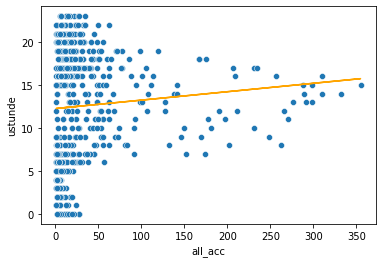

In [249]:
regression_line = lm.intercept_ + lm.coef_[0]*acc_log['all_acc']
plt.plot(acc_log['all_acc'], regression_line, c = 'orange')
sns.scatterplot(x='all_acc',y='ustunde',data=acc_log)
plt.show()

In [250]:
print('R2-score is', lm.score(X,y))

y_pred = lm.predict(X)
print(mean_squared_error(y_pred,y))

R2-score is 0.007286030742679195
42.14757244061429


In [239]:
y = acc_log['utyp1']
X = acc_log[['all_acc']]

lm = linear_model.LinearRegression()

lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

3.9394956805577475
[-0.00071851]


C:\Users\User\AppData\Local\Temp\ipykernel_12980\3722287206.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


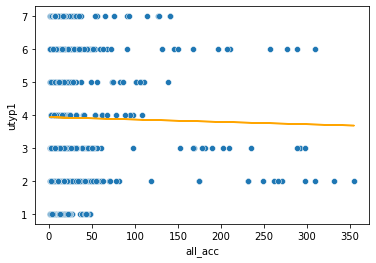

In [240]:
regression_line = lm.intercept_ + lm.coef_[0]*acc_log['all_acc']
plt.plot(acc_log['all_acc'], regression_line, c = 'orange')
sns.scatterplot(x='all_acc',y='utyp1',data=acc_log)
plt.show()

In [241]:
print('R2-score is', lm.score(X,y))

y_pred = lm.predict(X)
print(mean_squared_error(y_pred,y))

R2-score is 0.0004058628302143763
4.095628721192051


In [242]:
y = acc_log['utyp1']
X = acc_log[['all_acc']]

lm = linear_model.LinearRegression()

lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

3.9394956805577475
[-0.00071851]


C:\Users\User\AppData\Local\Temp\ipykernel_12980\2665496429.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


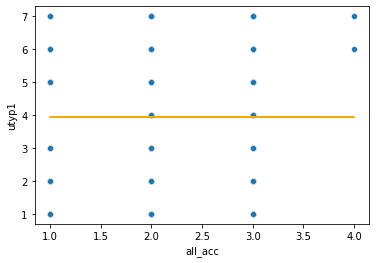

In [243]:
regression_line = lm.intercept_ + lm.coef_[0]*accidents_desc['all_acc']
plt.plot(accidents_desc['all_acc'], regression_line, c = 'orange')
sns.scatterplot(x='all_acc',y='utyp1',data=accidents_desc)
plt.show()

In [244]:
print('R2-score is', lm.score(X,y))

y_pred = lm.predict(X)
print(mean_squared_error(y_pred,y))

R2-score is 0.0004058628302143763
4.095628721192051


In [245]:
y = acc_log['ustrzustand']
X = acc_log[['all_acc']]

lm = linear_model.LinearRegression()

lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

0.6057836628715763
[-0.00290436]


C:\Users\User\AppData\Local\Temp\ipykernel_12980\1968969505.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


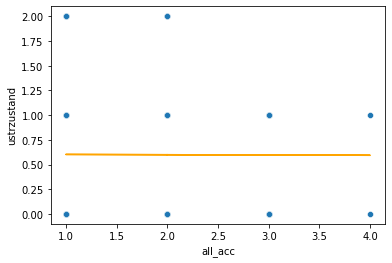

In [246]:
regression_line = lm.intercept_ + lm.coef_[0]*accidents_desc['all_acc']
plt.plot(accidents_desc['all_acc'], regression_line, c = 'orange')
sns.scatterplot(x='all_acc',y='ustrzustand',data=accidents_desc)
plt.show()

In [247]:
print('R2-score is', lm.score(X,y))

y_pred = lm.predict(X)
print(mean_squared_error(y_pred,y))

R2-score is 0.09147636188959041
0.2698642425720773


LOGISTIC REGRESSION 

In [283]:
accidents.head(5)

,ulichtverh,ustrzustand,all_acc,perc_bike_acc,rushhours
0,0,1,2,0.0,08 to 12
1,2,1,1,0.0,00 to 04
2,1,1,1,0.0,04 to 08
3,2,0,1,0.0,20 to 24
4,2,1,1,0.0,16 to 20


In [284]:
accidents.columns

Index(['ulichtverh', 'ustrzustand', 'all_acc', 'perc_bike_acc', 'rushhours'], dtype='object')

In [285]:
accidents = accidents.drop(['istrad', 'istpkw', 'istfuss', 'istkrad', 'istgkfz', 'istsonstige'], axis=1)

KeyError: "['istrad', 'istpkw', 'istfuss', 'istkrad', 'istgkfz', 'istsonstige'] not found in axis"

In [286]:
accidents.head(5)

,ulichtverh,ustrzustand,all_acc,perc_bike_acc,rushhours
0,0,1,2,0.0,08 to 12
1,2,1,1,0.0,00 to 04
2,1,1,1,0.0,04 to 08
3,2,0,1,0.0,20 to 24
4,2,1,1,0.0,16 to 20


In [308]:
y = accidents['all_acc']
X = accidents.drop(['rushhours'], axis=1)

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [310]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)

In [311]:
transformer = MinMaxScaler().fit(X_train_num)
x_normalized = transformer.transform(X_train_num)
print(x_normalized.shape)
x_normalized
X_train_scaled = pd.DataFrame(x_normalized, columns=X_train_num.columns)

(9448, 4)


In [312]:
# Logistic Regression 
classification = LogisticRegression(random_state=0)
classification.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [313]:
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled.head()

,ulichtverh,ustrzustand,all_acc,perc_bike_acc
0,1.0,0.5,0.333333,0.5
1,0.0,0.5,0.333333,0.0
2,0.0,0.0,0.000000,0.0
3,1.0,0.0,0.333333,0.5
4,0.0,0.0,0.333333,0.0


In [314]:
# accuracy of prediction
predictions = classification.predict(X_test_scaled)
predictions
aop = classification.score(X_test_scaled, y_test)
aop

0.3598645215918713

In [262]:
# score is pretty low

In [263]:
# there is a connection between road + light conditions and the rushhour times. 
# the propability for an accident in general is higher when there is a lot of traffic (rushhours) and the conditions are good, beacause people drive then more careless.
# accidents happen more or less randomly.